<a href="https://colab.research.google.com/github/RachanaRavindra97/Classification-of-Breast-Tumor-Tissue-Images/blob/main/Classification_of_Breast_Tumor_Tissue_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os 
from os import listdir
from tqdm import tqdm
import shutil

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image

%matplotlib inline
#************************************************

In [ ]:
#os.mkdir('augmented')
os.system('/content/drive/MyDrive/cs286 project/BreaKHis_v1/histology_slides/breast/benign/Merged')
os.system('/content/drive/MyDrive/cs286 project/BreaKHis_v1/histology_slides/breast/training')

32512

In [ ]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [ ]:
benign_images = getListOfFiles('/content/drive/MyDrive/CS 286 Project/CS 286 Shared/cs286 project/BreaKHis_v1/histology_slides/breast/benign/SOB')
malignant_images = getListOfFiles('/content/drive/MyDrive/CS 286 Project/CS 286 Shared/cs286 project/BreaKHis_v1/histology_slides/breast/malignant/SOB')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


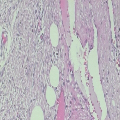

In [ ]:
image.load_img(benign_images[3], target_size=(120,120,1), grayscale=False)

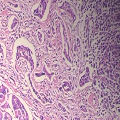

In [ ]:
image.load_img(malignant_images[3], target_size=(120,120,1), grayscale=False)

In [ ]:
total_images = len(benign_images) + len(malignant_images)
total_images

3954

In [ ]:
data = pd.DataFrame(index=np.arange(0, len(benign_images)+len(malignant_images)), columns=["image", "target"])
k=0

for c in [0,1]:
        if c==1:
            for m in range(len(benign_images)):
                data.iloc[k]["image"] = benign_images[m]
                data.iloc[k]["target"] = 0
                k += 1
        else:
            for m in range(len(malignant_images)):
                data.iloc[k]["image"] = malignant_images[m]
                data.iloc[k]["target"] = 1
                k += 1

In [ ]:
data.head(10)

,image,target
0,/content/drive/MyDrive/CS 286 Project/CS 286 S...,1
1,/content/drive/MyDrive/CS 286 Project/CS 286 S...,1
2,/content/drive/MyDrive/CS 286 Project/CS 286 S...,1
3,/content/drive/MyDrive/CS 286 Project/CS 286 S...,1
4,/content/drive/MyDrive/CS 286 Project/CS 286 S...,1
5,/content/drive/MyDrive/CS 286 Project/CS 286 S...,1
6,/content/drive/MyDrive/CS 286 Project/CS 286 S...,1
7,/content/drive/MyDrive/CS 286 Project/CS 286 S...,1
8,/content/drive/MyDrive/CS 286 Project/CS 286 S...,1
9,/content/drive/MyDrive/CS 286 Project/CS 286 S...,1


In [ ]:
data.shape

(3954, 2)

In [ ]:
count_data = data["target"].value_counts()
count_data

0    2494
1    1460
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


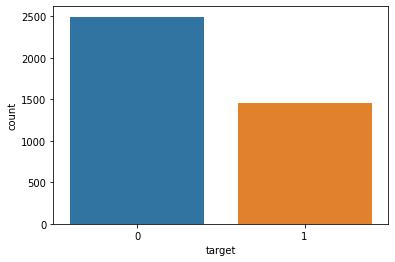

In [ ]:
import seaborn as sns

target = sns.countplot(data["target"])
target.set_xticklabels(['0','1'])
plt.show()

In [ ]:
ben_upsampled = resample(data[data['target']==0],n_samples=data[data['target']==1].shape[0], random_state=42)

up_sampled = pd.concat([data[data['target']==1], ben_upsampled])

up_sampled['target'].value_counts()

1    1460
0    1460
Name: target, dtype: int64

In [ ]:
ben_upsampled.head(10)

,image,target
2320,/content/drive/MyDrive/CS 286 Project/CS 286 S...,0
2754,/content/drive/MyDrive/CS 286 Project/CS 286 S...,0
2590,/content/drive/MyDrive/CS 286 Project/CS 286 S...,0
2555,/content/drive/MyDrive/CS 286 Project/CS 286 S...,0
3098,/content/drive/MyDrive/CS 286 Project/CS 286 S...,0
3629,/content/drive/MyDrive/CS 286 Project/CS 286 S...,0
1926,/content/drive/MyDrive/CS 286 Project/CS 286 S...,0
2698,/content/drive/MyDrive/CS 286 Project/CS 286 S...,0
1790,/content/drive/MyDrive/CS 286 Project/CS 286 S...,0
2942,/content/drive/MyDrive/CS 286 Project/CS 286 S...,0


In [ ]:
up_sampled.shape

(2920, 2)

In [ ]:
train_image = []
y = []

for i in tqdm(range(up_sampled.shape[0])):
    img = image.load_img(up_sampled['image'].iloc[i], target_size=(32,32,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)
y = up_sampled.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2 , shuffle=True)

Y_train = to_categorical(y_train, 2)
Y_test = to_categorical(y_test, 2)
Y_val = to_categorical(y_val, 2)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

100%|██████████| 2920/2920 [12:28<00:00,  3.90it/s]

(2336, 32, 32, 3)
(467, 32, 32, 3)
(117, 32, 32, 3)


In [ ]:
pip install np_utils

     |████████████████████████████████| 61 kB 455 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=056b2b7aef66ba6769a453f515aca3bcd65cdbf08269e2393884fc27e168bcb5
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [ ]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train, 2)
Y_test = to_categorical(y_test, 2)
Y_val = to_categorical(y_val, 2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2336, 32, 32, 3)
(467, 32, 32, 3)
(117, 32, 32, 3)


In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(2336,)
(467,)
(117,)


In [ ]:
model = Sequential()
#convlouton layer with the number of filters, filter size, strides steps, padding or no, activation type and the input shape.
model.add(Conv2D(30, kernel_size = (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,3)))
#pooling layer to reduce the volume of input image after convolution,
model.add(MaxPool2D(pool_size=(1,1)))
#flatten layer to flatten the output
model.add(Flatten())   # flatten output of conv
model.add(Dense(150, activation='relu'))  # hidden layer of 150 neuron
model.add(Dense(2, activation='softmax'))  # output layer
model.compile(loss='categorical_crossentropy', metrics= ['accuracy'], optimizer='adam')
history = model.fit(X_train, Y_train, batch_size=20, epochs = 20, validation_data=(X_test, Y_test))

Epoch 1/20
117/117 [==============================] - 9s 66ms/step - loss: 0.6219 - accuracy: 0.7162 - val_loss: 0.4696 - val_accuracy: 0.7880
Epoch 2/20
117/117 [==============================] - 4s 37ms/step - loss: 0.4759 - accuracy: 0.7885 - val_loss: 0.4527 - val_accuracy: 0.8030
Epoch 3/20
117/117 [==============================] - 4s 37ms/step - loss: 0.4357 - accuracy: 0.8039 - val_loss: 0.3952 - val_accuracy: 0.8308
Epoch 4/20
117/117 [==============================] - 4s 37ms/step - loss: 0.4470 - accuracy: 0.7949 - val_loss: 0.3956 - val_accuracy: 0.8223
Epoch 5/20
117/117 [==============================] - 4s 37ms/step - loss: 0.3819 - accuracy: 0.8305 - val_loss: 0.3877 - val_accuracy: 0.8308
Epoch 6/20
117/117 [==============================] - 4s 37ms/step - loss: 0.3521 - accuracy: 0.8429 - val_loss: 0.3767 - val_accuracy: 0.8630
Epoch 7/20
117/117 [==============================] - 4s 37ms/step - loss: 0.3004 - accuracy: 0.8784 - val_loss: 0.3870 - val_accuracy: 0.8351

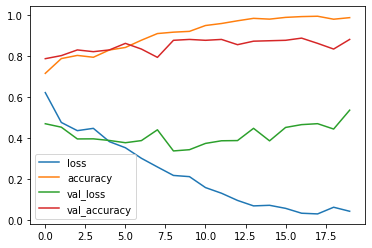

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

y_pred = model.predict(X_val)
classes_x = np.argmax(y_pred,axis=1)
acc_test = 0

for i in range(X_val.shape[0]):
    if(classes_x[i] == y_val[i]):
        acc_test= acc_test+1
print("Accuracy test : "  , acc_test/X_val.shape[0]*100)

Accuracy test :  84.61538461538461


In [ ]:
y_pred = model.predict(X_test)
classes_x = np.argmax(y_pred,axis=1)
acc_test = 0

for i in range(X_test.shape[0]):
    if(classes_x[i] == y_test[i]):
        acc_test= acc_test+1
print("Accuracy test : "  , acc_test/X_test.shape[0]*100)

Accuracy test :  88.22269807280514


# Transfer Learning

# ResNet

In [ ]:
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))
    
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    
    return model

In [ ]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from tensorflow.keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools


%matplotlib inline

In [ ]:
from keras import backend as K
import gc

K.clear_session()
gc.collect()

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(32,32,3)
)

model = build_model(resnet ,lr = 1e-4)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1, 1, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2)                 3842      
                                                                 


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Total params: 18,333,506
Trainable params: 18,100,610
Non-trainable params: 232,896
_________________________________________________________________


In [ ]:
# Learning Rate Reducer
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="C:/Users/Checkout/Documents/CS 286 Project/weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
BATCH_SIZE = 16

# Using original generator
train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
    )

In [ ]:
history = model.fit_generator(
    train_generator.flow(X_train, Y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=X_train.shape[0] / BATCH_SIZE,
    epochs=20,
    validation_data=(X_val, Y_val),
    callbacks=[learn_control, checkpoint]
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


146/146 [==============================] - 192s 1s/step - loss: 0.6560 - accuracy: 0.6592 - val_loss: 0.6684 - val_accuracy: 0.6581 - lr: 1.0000e-04
Epoch 2/20
146/146 [==============================] - 153s 1s/step - loss: 0.4728 - accuracy: 0.7979 - val_loss: 0.5263 - val_accuracy: 0.7692 - lr: 1.0000e-04
Epoch 3/20
146/146 [==============================] - 152s 1s/step - loss: 0.4247 - accuracy: 0.8211 - val_loss: 0.3465 - val_accuracy: 0.8547 - lr: 1.0000e-04
Epoch 4/20
146/146 [==============================] - 158s 1s/step - loss: 0.3995 - accuracy: 0.8275 - val_loss: 0.2956 - val_accuracy: 0.9060 - lr: 1.0000e-04
Epoch 5/20
146/146 [==============================] - 153s 1s/step - loss: 0.3634 - accuracy: 0.8472 - val_loss: 0.2360 - val_accuracy: 0.8974 - lr: 1.0000e-04
Epoch 6/20
146/146 [==============================] - 152s 1s/step - loss: 0.3569 - accuracy: 0.8523 - val_loss: 0.2916 - val_accuracy: 0.8718 - lr: 1.0000e-04
Epoch 7/20
146/146 [==============================]

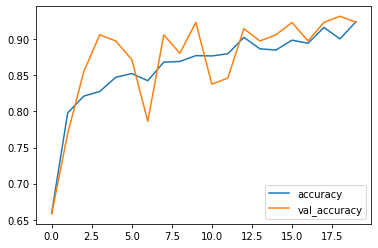

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

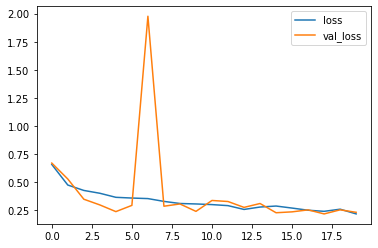

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

In [ ]:
#model.load_weights("C:/Users/Checkout/Documents/CS 286 Project/weights.best.hdf5")
Y_val_pred = model.predict(X_val)
accuracy_score(np.argmax(Y_val, axis=1), np.argmax(Y_val_pred, axis=1))

0.9230769230769231

In [ ]:
Y_pred = model.predict(X_test)
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(train_generator.flow(X_test, batch_size=BATCH_SIZE, shuffle=False),
                                    steps = len(X_test)/BATCH_SIZE)
    
    predictions.append(preds)
    gc.collect()
    
Y_pred_tta = np.mean(predictions, axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys
100%|██████████| 10/10 [00:48<00:00,  4.89s/it]
